# Preparación y carga de datos

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Opciones de visualización
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (9,5)
RANDOM_STATE = 42


# Carga y checks iniciales

In [5]:
df = pd.read_csv('kick_chat_datasetV4.csv')
display(df.shape)
display(df.info())
display(df.isnull().sum())
display(df.head(6))
display(df.describe(include='all').T)


(2357, 17)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             2357 non-null   int64  
 1   username            2357 non-null   object 
 2   frequency           2357 non-null   float64
 3   avg_message_length  2357 non-null   float64
 4   total_messages      2357 non-null   int64  
 5   url_ratio           2357 non-null   float64
 6   repetition_ratio    2357 non-null   float64
 7   time_in_channel     2357 non-null   int64  
 8   suspicious_links    2357 non-null   int64  
 9   generic_name        2357 non-null   int64  
 10  username_length     2357 non-null   int64  
 11  has_numbers         2357 non-null   int64  
 12  has_underscore      2357 non-null   int64  
 13  numeric_ratio       2357 non-null   float64
 14  uppercase_ratio     2357 non-null   float64
 15  special_char_count  2357 non-null   int64  
 16  is_bot

None

user_id               0
username              0
frequency             0
avg_message_length    0
total_messages        0
url_ratio             0
repetition_ratio      0
time_in_channel       0
suspicious_links      0
generic_name          0
username_length       0
has_numbers           0
has_underscore        0
numeric_ratio         0
uppercase_ratio       0
special_char_count    0
is_bot                0
dtype: int64

,user_id,username,frequency,avg_message_length,total_messages,url_ratio,repetition_ratio,time_in_channel,suspicious_links,generic_name,username_length,has_numbers,has_underscore,numeric_ratio,uppercase_ratio,special_char_count,is_bot
0,14571583,alevidallet,0.008197,61.000000,1,1.000000,1.0,122,0,0,11,0,0,0.0,0.000000,0,1
1,31786811,Mamamel,0.006849,18.000000,1,0.000000,1.0,146,0,0,7,0,0,0.0,0.142857,0,0
2,81728471,ddu10,0.057692,61.166667,12,0.916667,2.0,208,0,0,5,1,0,0.4,0.000000,0,1
3,80625623,ariadnaa00,0.043956,69.000000,4,1.000000,4.0,91,0,0,10,1,0,0.2,0.000000,0,1
4,79474351,cviento,0.030303,64.000000,1,0.000000,1.0,33,0,0,7,0,0,0.0,0.000000,0,0
5,63534649,Lautaro_RBL,0.115385,62.666667,15,1.000000,7.5,130,0,0,11,0,1,0.0,0.363636,1,1


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,2357.0,NaN,NaN,NaN,47213708.341536,23370846.640874,9082.0,31858694.0,48426994.0,64764396.0,83610897.0
username,2357,1431,sebasguti08,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
frequency,2357.0,NaN,NaN,NaN,0.128328,0.395307,0.004167,0.013699,0.033333,0.110553,11.857143
avg_message_length,2357.0,NaN,NaN,NaN,41.003686,32.347714,2.0,18.0,26.0,61.0,455.0
total_messages,2357.0,NaN,NaN,NaN,7.924905,11.2391,1.0,1.0,3.0,12.0,87.0
url_ratio,2357.0,NaN,NaN,NaN,0.377009,0.46288,0.0,0.0,0.0,1.0,1.0
repetition_ratio,2357.0,NaN,NaN,NaN,2.604383,3.393378,1.0,1.0,1.0,3.0,40.0
time_in_channel,2357.0,NaN,NaN,NaN,111.543063,63.008525,5.0,67.0,110.0,158.0,240.0
suspicious_links,2357.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
generic_name,2357.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Seleccion de los features a usar (numéricas y binarias) y limpieza de nulos mínimos

In [7]:
#  Features seleccionadas y limpieza mínima
features = [
    'frequency','avg_message_length','total_messages','url_ratio','repetition_ratio',
    'time_in_channel','numeric_ratio','uppercase_ratio','special_char_count','username_length',
    'suspicious_links','generic_name','has_numbers','has_underscore'
]

# Asegurar no nulos en features
X = df[features].copy().fillna(0)
y = df['is_bot'].astype(int).copy()

# Quick check de clases
display(y.value_counts(normalize=False))
display(y.value_counts(normalize=True))


is_bot
0    1414
1     943
Name: count, dtype: int64

is_bot
0    0.599915
1    0.400085
Name: proportion, dtype: float64

# Justificación de las etiquetas heurísticas
La columna is_bot fue creada aplicando la regla: usuario etiquetado como bot si cumple ≥3 de los 6 criterios definidos por la cátedra.

Conversión usada: 30 mensajes/hora = 0.5 mensajes/minuto.

# Distribuciones y correlación

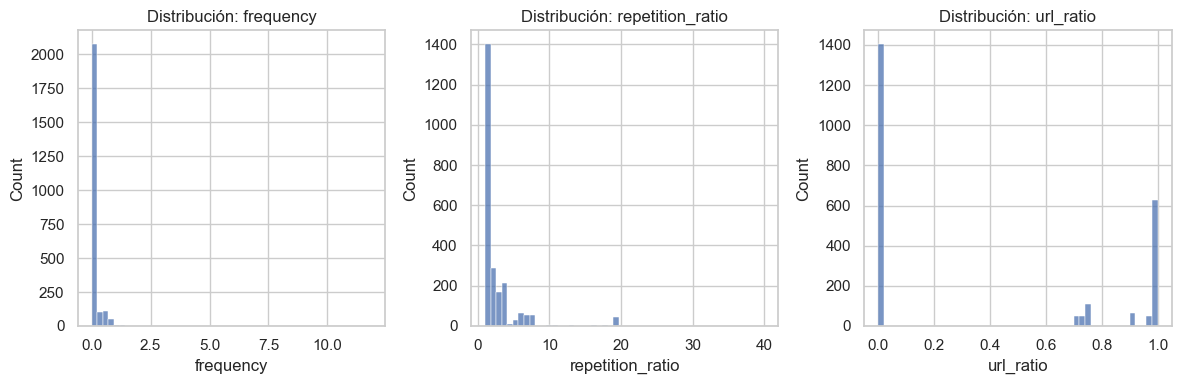

In [9]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(df['frequency'], bins=50, kde=False)
plt.title('Distribución: frequency')

plt.subplot(1,3,2)
sns.histplot(df['repetition_ratio'], bins=50, kde=False)
plt.title('Distribución: repetition_ratio')

plt.subplot(1,3,3)
sns.histplot(df['url_ratio'], bins=50, kde=False)
plt.title('Distribución: url_ratio')
plt.tight_layout()
plt.show()


# Correlación

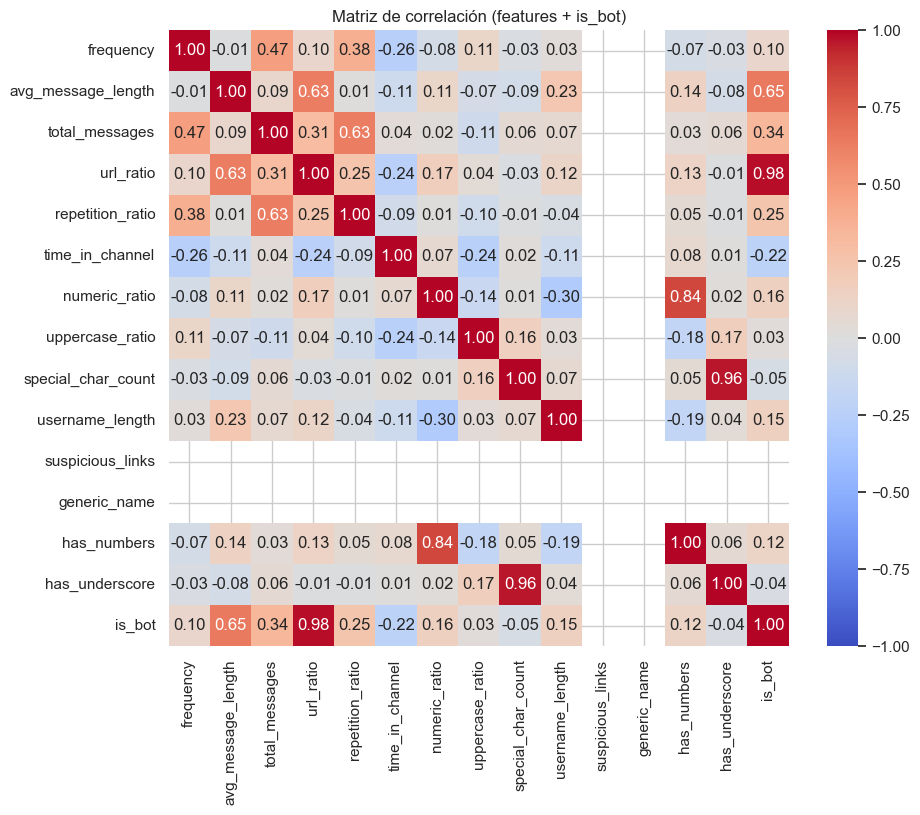

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df[features + ['is_bot']].corr(), annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación (features + is_bot)')
plt.show()


# Modelo supervisado Regresión Logística

In [13]:

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=RANDOM_STATE)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(class_weight='balanced', solver='saga', max_iter=5000, random_state=RANDOM_STATE))
])

param_grid = {'clf__C': [0.01, 0.1, 1, 10], 'clf__penalty': ['l2', 'l1']}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
search = GridSearchCV(pipe, param_grid, cv=cv, scoring='f1', n_jobs=-1)
search.fit(X_train, y_train)

best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]

# Metricas

In [15]:
print("Mejores hiperparámetros:", search.best_params_)
print("\nClassification report (test):")
print(classification_report(y_test, y_pred))
print("ROC AUC (test):", roc_auc_score(y_test, y_proba))

Mejores hiperparámetros: {'clf__C': 1, 'clf__penalty': 'l2'}

Classification report (test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       283
           1       0.99      1.00      1.00       189

    accuracy                           1.00       472
   macro avg       1.00      1.00      1.00       472
weighted avg       1.00      1.00      1.00       472

ROC AUC (test): 0.9993082431244975


# Matriz de confusión visual

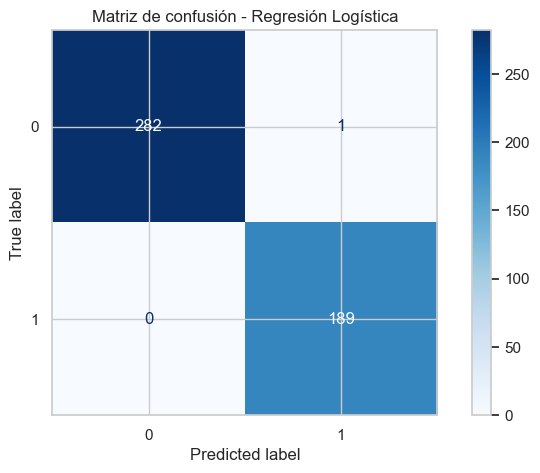

In [17]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.named_steps['clf'].classes_)
disp.plot(cmap='Blues')
plt.title('Matriz de confusión - Regresión Logística')
plt.show()

# Coeficientes interpretables (estandarizados por scaler)

In [19]:
coef = best_model.named_steps['clf'].coef_[0]
feat_coef = pd.Series(coef, index=features).sort_values(key=abs, ascending=False)
display(feat_coef)

url_ratio             5.209408
total_messages        0.460451
username_length       0.443241
avg_message_length    0.429730
repetition_ratio      0.356518
numeric_ratio         0.314072
time_in_channel      -0.249960
special_char_count   -0.180466
frequency            -0.179854
has_underscore       -0.178398
has_numbers           0.122964
uppercase_ratio      -0.108549
suspicious_links      0.000000
generic_name          0.000000
dtype: float64

# Barplot coeficientes

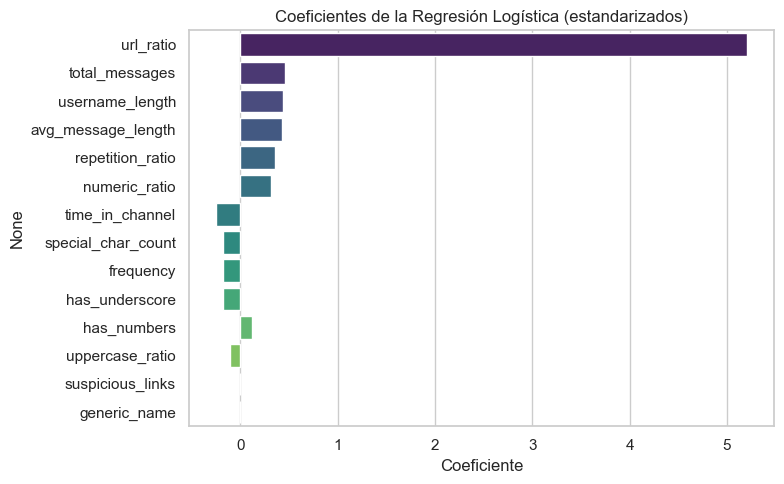

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(x=feat_coef.values, y=feat_coef.index, hue=feat_coef.index, palette='viridis', legend=False)
plt.title('Coeficientes de la Regresión Logística (estandarizados)')
plt.xlabel('Coeficiente')
plt.tight_layout()
plt.show()

# Validación con K Means no supervisado

In [23]:
# 8. KMeans validación (usar features seleccionadas)
km_features = ['frequency','repetition_ratio','url_ratio','suspicious_links','avg_message_length','generic_name']
X_km = df[km_features].fillna(0).copy()

scaler_km = StandardScaler()
X_km_scaled = scaler_km.fit_transform(X_km)

# PCA para visualización
pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_km_scaled)

# KMeans
kmeans = KMeans(n_clusters=2, random_state=RANDOM_STATE, n_init=10)
clusters = kmeans.fit_predict(X_km_scaled)
df['cluster'] = clusters

# Mapear cada cluster a la etiqueta dominante (0/1) para comparar
cluster_map = df.groupby('cluster')['is_bot'].mean().to_dict()
df['cluster_mapped_is_bot'] = df['cluster'].map(lambda c: 1 if cluster_map[c] > 0.5 else 0)

# Métricas de concordancia

In [25]:
ari = adjusted_rand_score(df['is_bot'], df['cluster'])
nmi = normalized_mutual_info_score(df['is_bot'], df['cluster'])
agreement_pct = (df['is_bot'] == df['cluster_mapped_is_bot']).mean()

print('Adjusted Rand Index (ARI):', ari)
print('Normalized Mutual Information (NMI):', nmi)
print('Porcentaje de coincidencia (heurística vs cluster_mapped):', agreement_pct)

Adjusted Rand Index (ARI): 0.9119583474470746
Normalized Mutual Information (NMI): 0.864313174940417
Porcentaje de coincidencia (heurística vs cluster_mapped): 0.9775137887144676


# Matriz de confusión entre is_bot y cluster_mapped

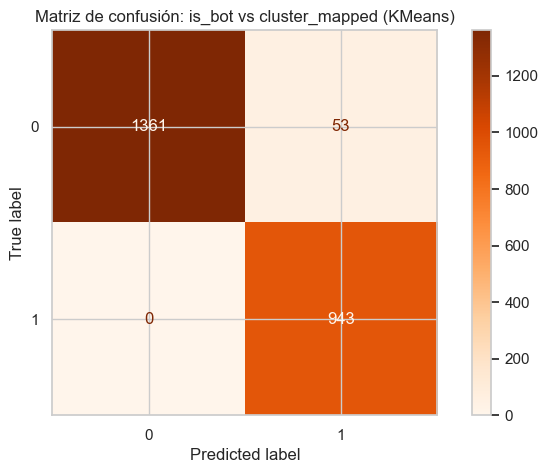

In [27]:
cm_k = confusion_matrix(df['is_bot'], df['cluster_mapped_is_bot'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_k, display_labels=[0,1])
disp.plot(cmap='Oranges')
plt.title('Matriz de confusión: is_bot vs cluster_mapped (KMeans)')
plt.show()

# Visualización PCA: por cluster y por is_bot

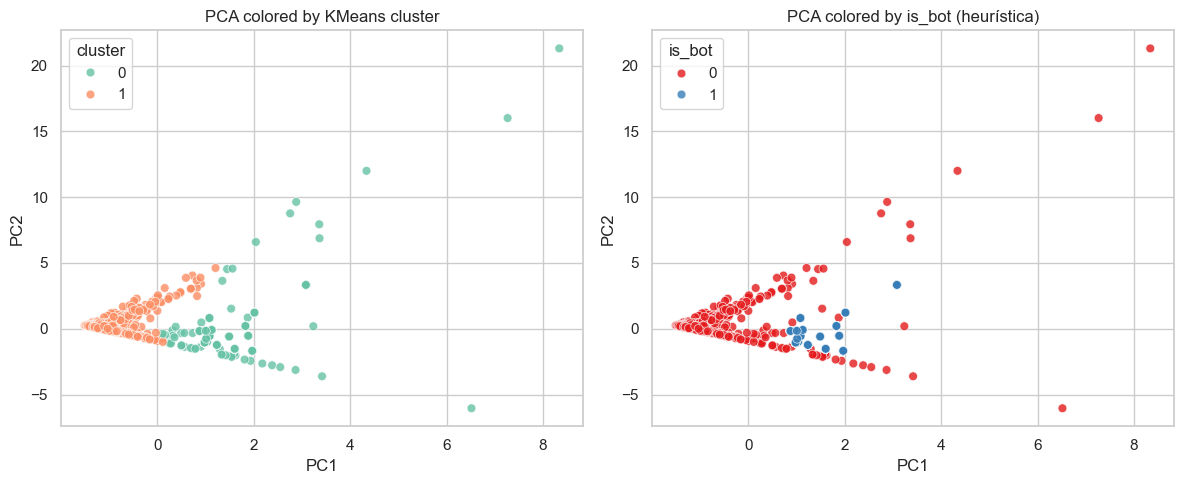

In [29]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['cluster'], palette='Set2', s=40, alpha=0.8)
plt.title('PCA colored by KMeans cluster')
plt.xlabel('PC1'); plt.ylabel('PC2')

plt.subplot(1,2,2)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['is_bot'], palette='Set1', s=40, alpha=0.8)
plt.title('PCA colored by is_bot (heurística)')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.tight_layout()
plt.show()

# Análisis comparativo y discrepancias

In [31]:
# 9. Diferencias de medias por cluster y por etiqueta heurística
diff_by_cluster = df.groupby('cluster')[km_features].mean().T
diff_by_label = df.groupby('is_bot')[km_features].mean().T
display(diff_by_cluster)
display(diff_by_label)

# Casos discrepantes entre la etiqueta heurística y el clustering mapeado
discrepancies = df[df['is_bot'] != df['cluster_mapped_is_bot']]
display(discrepancies[['username','frequency','total_messages','repetition_ratio','url_ratio','suspicious_links','avg_message_length','is_bot','cluster']].sample(12, random_state=RANDOM_STATE))

# Contar discrepancias
print("Total discrepancias:", discrepancies.shape[0], "de", df.shape[0])


cluster,0,1
frequency,0.217384,0.063155
repetition_ratio,3.707782,1.796899
url_ratio,0.890757,0.001041
suspicious_links,0.000000,0.000000
avg_message_length,69.114881,20.431496
generic_name,0.000000,0.000000


is_bot,0,1
frequency,0.095568,0.177449
repetition_ratio,1.914247,3.639221
url_ratio,0.005450,0.934150
suspicious_links,0.000000,0.000000
avg_message_length,23.919495,66.620913
generic_name,0.000000,0.000000


,username,frequency,total_messages,repetition_ratio,url_ratio,suspicious_links,avg_message_length,is_bot,cluster
938,Eldita4k1,0.027027,2,1.000000,0.0,0,248.000000,0,0
1794,Hor2313234,0.168831,39,7.800000,0.0,0,88.102564,0,0
2160,josue_13536,0.016949,2,1.000000,0.0,0,166.500000,0,0
539,jul3r,0.040323,5,1.000000,0.0,0,172.200000,0,0
1903,alberth_33,0.200000,3,1.500000,0.0,0,96.000000,0,0
270,Franciscobarboza,1.400000,14,1.750000,0.0,0,131.214286,0,0
736,nahuel_ez,0.010309,1,1.000000,0.0,0,126.000000,0,0
2272,Leo5514,0.012195,1,1.000000,0.0,0,162.000000,0,0
210,gxldeluchofcb,0.006369,1,1.000000,0.0,0,119.000000,0,0
1450,Kqmila,0.250000,4,1.000000,1.0,0,37.250000,0,0


Total discrepancias: 53 de 2357
